IMPORT NECESSARY LIBRARIES

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
import numpy as np

In [3]:
df = pd.read_csv('shopping_trends.csv')

In [4]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


CONDUCTING DATA PRE-PROCESSING

In [6]:
#check for missing values 
missing_values = df.isnull().sum()
print(missing_values)

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64


In [7]:
#check for duplicates
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Customer ID, Age, Gender, Item Purchased, Category, Purchase Amount (USD), Location, Size, Color, Season, Review Rating, Subscription Status, Payment Method, Shipping Type, Discount Applied, Promo Code Used, Previous Purchases, Preferred Payment Method, Frequency of Purchases]
Index: []


In [8]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [9]:
if 'Item Purchased' not in df.columns:
  print("The DataFrame does not have a column named 'variable_column'")
else:
  number_of_unique_entries = df['Item Purchased'].nunique()
  print(f"There are {number_of_unique_entries} unique entries in the 'Item_Purchased'.")

There are 25 unique entries in the 'Item_Purchased'.


In [10]:
df['Item Purchased'].unique()

array(['Blouse', 'Sweater', 'Jeans', 'Sandals', 'Sneakers', 'Shirt',
       'Shorts', 'Coat', 'Handbag', 'Shoes', 'Dress', 'Skirt',
       'Sunglasses', 'Pants', 'Jacket', 'Hoodie', 'Jewelry', 'T-shirt',
       'Scarf', 'Hat', 'Socks', 'Backpack', 'Belt', 'Boots', 'Gloves'],
      dtype=object)

In [11]:
frequency_mapping = {
    'Fortnightly': 26,
    'Weekly': 52,
    'Monthly': 12,
    'Anually': 1,
    'Bi-Weekly':26,
    'Every 3 months':4
}

# Apply the mapping to the 'Frequency of Purchases' column
df['Frequency of Purchases (Numeric)'] = df['Frequency of Purchases'].map(frequency_mapping)

In [12]:
# Map seasons to numeric values
season_mapping = {'Spring': 1, 'Summer': 2, 'Fall': 3, 'Winter': 4}
df['Season_Numeric'] = df['Season'].map(season_mapping)

In [13]:
print(df)

      Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  ...  \
0                        53       Kentucky    L       Gray  Winter  ...   
1                        64          Maine    L     Maroon  Winter  ...   
2                        73  M

In [14]:
print(df[['Customer ID', 'Frequency of Purchases', 'Frequency of Purchases (Numeric)','Season_Numeric']])

      Customer ID Frequency of Purchases  Frequency of Purchases (Numeric)  \
0               1            Fortnightly                              26.0   
1               2            Fortnightly                              26.0   
2               3                 Weekly                              52.0   
3               4                 Weekly                              52.0   
4               5               Annually                               NaN   
...           ...                    ...                               ...   
3895         3896                 Weekly                              52.0   
3896         3897              Bi-Weekly                              26.0   
3897         3898              Quarterly                               NaN   
3898         3899                 Weekly                              52.0   
3899         3900              Quarterly                               NaN   

      Season_Numeric  
0                  4  
1                

In [15]:
df= df.dropna(subset=['Frequency of Purchases (Numeric)','Season_Numeric'])

# Drop columns with any missing values
df = df.dropna(axis=1)

# Drop rows where all columns have missing values
df = df.dropna(how='all')

In [16]:
print(df[[ 'Frequency of Purchases (Numeric)','Season_Numeric']])

      Frequency of Purchases (Numeric)  Season_Numeric
0                                 26.0               4
1                                 26.0               4
2                                 52.0               1
3                                 52.0               1
5                                 52.0               2
...                                ...             ...
3892                              26.0               2
3893                              26.0               3
3895                              52.0               2
3896                              26.0               1
3898                              52.0               2

[2181 rows x 2 columns]


In [17]:
season_frequency = df.groupby('Season')['Frequency of Purchases (Numeric)'].sum().reset_index()

# Find the season with the highest total frequency of purchases
most_frequent_season = season_frequency.loc[season_frequency['Frequency of Purchases (Numeric)'].idxmax()]

print("Season with the most frequent purchases:")
print(most_frequent_season)

Season with the most frequent purchases:
Season                               Spring
Frequency of Purchases (Numeric)    16600.0
Name: 1, dtype: object


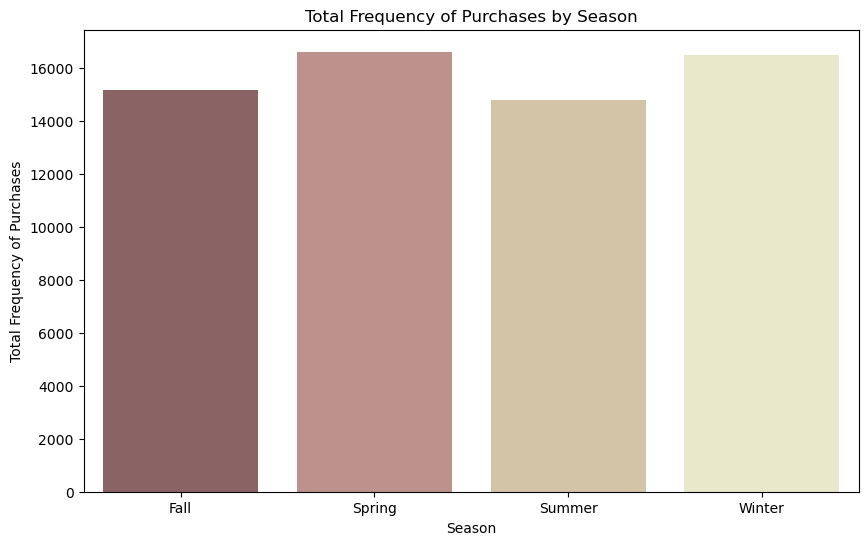

In [18]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=season_frequency, x='Season', y='Frequency of Purchases (Numeric)', palette='pink')
plt.title("Total Frequency of Purchases by Season")
plt.xlabel("Season")
plt.ylabel("Total Frequency of Purchases")
plt.show()

In [19]:
# Group by season and sum the frequency of purchases
season_frequency = df.groupby('Season')['Frequency of Purchases (Numeric)'].sum().reset_index()

# Sort the seasons in descending order by the total frequency of purchases
season_frequency_sorted = season_frequency.sort_values(by='Frequency of Purchases (Numeric)', ascending=False)

print("Seasons listed in descending order of total frequency of purchases:")
print(season_frequency_sorted)

Seasons listed in descending order of total frequency of purchases:
   Season  Frequency of Purchases (Numeric)
1  Spring                           16600.0
3  Winter                           16462.0
0    Fall                           15138.0
2  Summer                           14778.0


In [20]:
# Group by season and sum  of purchases
purchase_amount = df.groupby('Season')['Purchase Amount (USD)'].sum().reset_index()

# Sort the seasons in descending order by the total frequency of purchases
season_purchase_sorted = purchase_amount.sort_values(by='Purchase Amount (USD)', ascending=False)

print("Seasons listed in descending order of total purchase amount: ")
print(season_purchase_sorted)

Seasons listed in descending order of total purchase amount: 
   Season  Purchase Amount (USD)
3  Winter                  34443
1  Spring                  33278
0    Fall                  31994
2  Summer                  30088


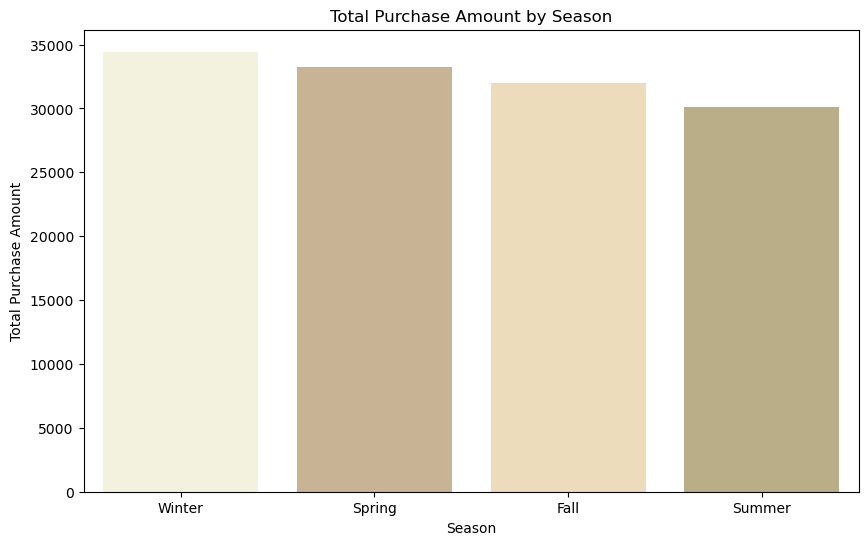

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(data=season_purchase_sorted, x='Season', y='Purchase Amount (USD)', palette=['#F5F5DC', '#D2B48C', '#F5DEB3', '#C2B280'])
plt.title("Total Purchase Amount by Season")
plt.xlabel("Season")
plt.ylabel("Total Purchase Amount")
plt.show()

In [22]:
winter_data = df[df['Season'] == 'Winter']

# Step 2: Group by item name and count the number of purchases for each item
item_counts_winter = winter_data['Item Purchased'].value_counts().reset_index()
item_counts_winter.columns = ['Item Purchased', 'Count']

# Step 3: Select the top 5 most purchased items
top_5_items_winter = item_counts_winter.head(5)

print("Top 5 most purchased items during Winter:")
print(top_5_items_winter)

Top 5 most purchased items during Winter:
  Item Purchased  Count
0         Hoodie     33
1          Shirt     31
2          Pants     28
3           Coat     27
4        Jewelry     27


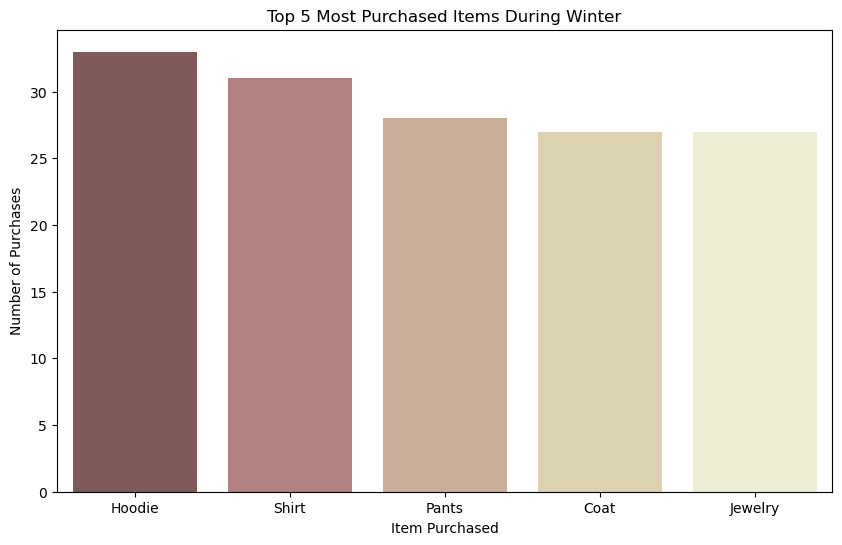

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_items_winter, x='Item Purchased', y='Count', palette='pink')
plt.title("Top 5 Most Purchased Items During Winter")
plt.xlabel("Item Purchased")
plt.ylabel("Number of Purchases")
plt.show()

In [24]:
# Define function to categorize ages into generations
def categorize_generation(age):
    if age <= 24:
        return 'Gen Z'
    elif age <= 40:
        return 'Millennial'
    elif age <= 56:
        return 'Gen X'
    elif age <= 74:
        return 'Baby Boomer'
    else:
        return 'Silent Generation'

In [25]:
# Apply the function to the Age column
df['Generation'] = df['Age'].apply(categorize_generation)

In [26]:
# Map generations to numeric values
generation_mapping = {'Gen Z': 1, 'Millennial': 2, 'Gen X': 3, 'Baby Boomer': 4, 'Silent Generation': 5}
df['Generation_Numeric'] = df['Generation'].map(generation_mapping)

# Handle missing values
df.dropna(inplace=True)


In [27]:
# Custom color palette
custom_palette = sns.color_palette(["#FFE4C4", "#FFB6C1", "#FFDAB9", "#FFC0CB", "#FFD700"])

In [28]:
# Step 1: Summarize data by generation
purchase_by_generation = df.groupby('Generation')['Purchase Amount (USD)'].sum().reset_index()
frequency_by_generation = df.groupby('Generation')['Frequency of Purchases (Numeric)'].mean().reset_index()

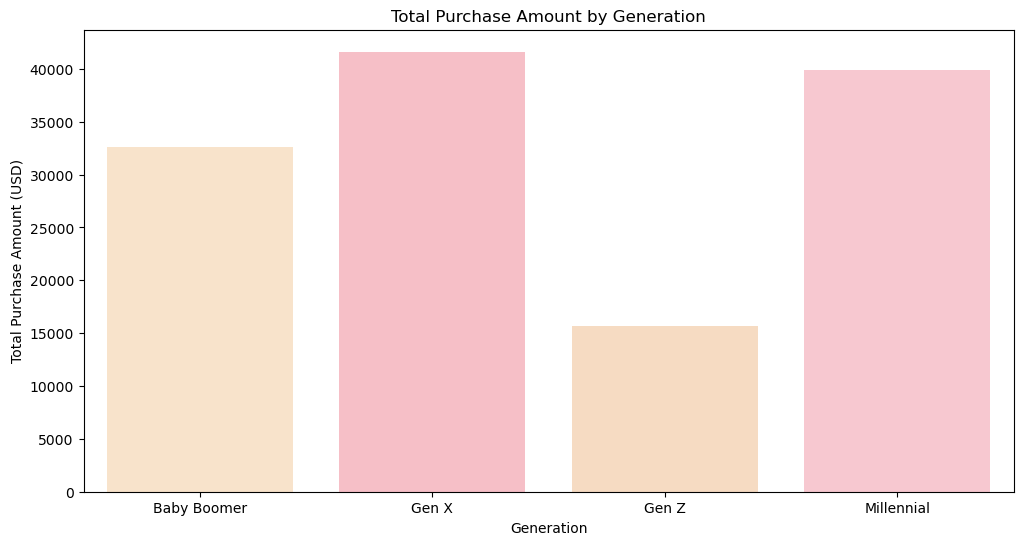

In [29]:
# Step 2: Plot Purchase Amount by Generation
plt.figure(figsize=(12, 6))
sns.barplot(x='Generation', y='Purchase Amount (USD)', data=purchase_by_generation, palette=custom_palette)
plt.title('Total Purchase Amount by Generation')
plt.xlabel('Generation')
plt.ylabel('Total Purchase Amount (USD)')
plt.show()

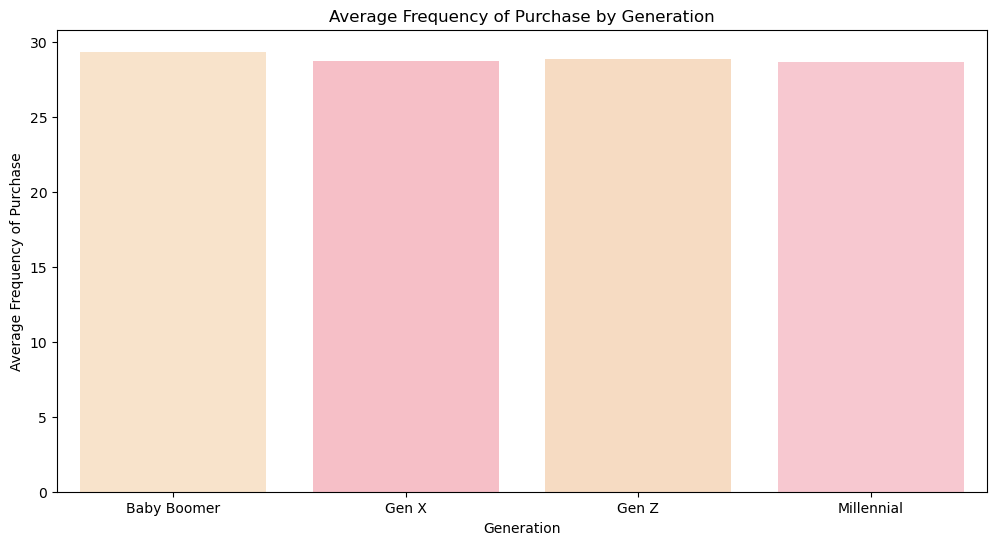

In [30]:
custom_palette = sns.color_palette(["#FFE4C4", "#FFB6C1", "#FFDAB9", "#FFC0CB", "#FFD700"])
plt.figure(figsize=(12, 6))
sns.barplot(x='Generation', y='Frequency of Purchases (Numeric)', data=frequency_by_generation, palette=custom_palette)
plt.title('Average Frequency of Purchase by Generation')
plt.xlabel('Generation')
plt.ylabel('Average Frequency of Purchase')
plt.show()


In [31]:
# Step 4: Summarize data by gender
purchase_by_gender = df.groupby('Gender')['Purchase Amount (USD)'].sum().reset_index()
frequency_by_gender = df.groupby('Gender')['Frequency of Purchases (Numeric)'].mean().reset_index()


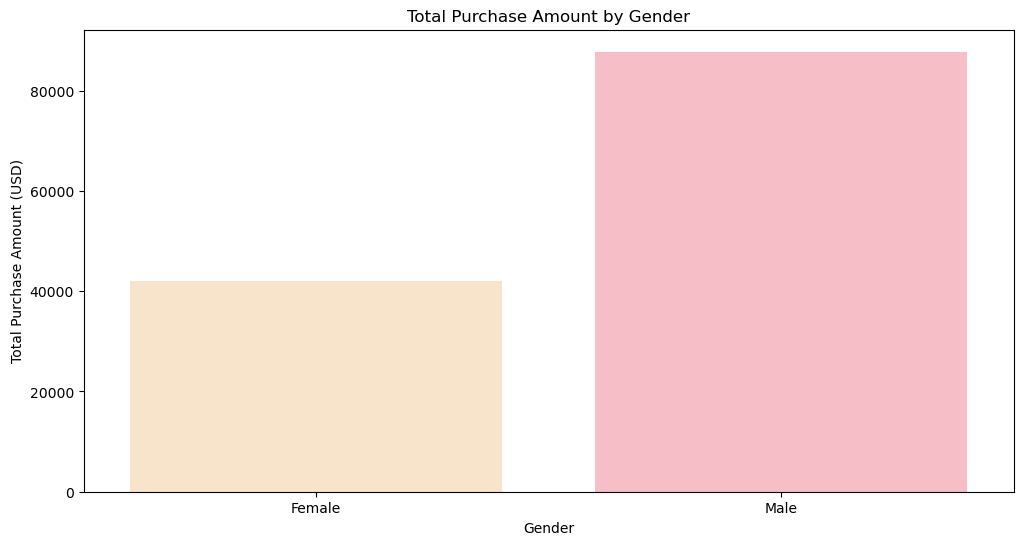

In [32]:
# Step 5: Plot Purchase Amount by Gender
custom_palette = sns.color_palette(["#FFE4C4", "#FFB6C1", "#FFDAB9", "#FFC0CB", "#FFD700"])
plt.figure(figsize=(12, 6))
sns.barplot(x='Gender', y='Purchase Amount (USD)', data=purchase_by_gender, palette=custom_palette)
plt.title('Total Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Purchase Amount (USD)')
plt.show()

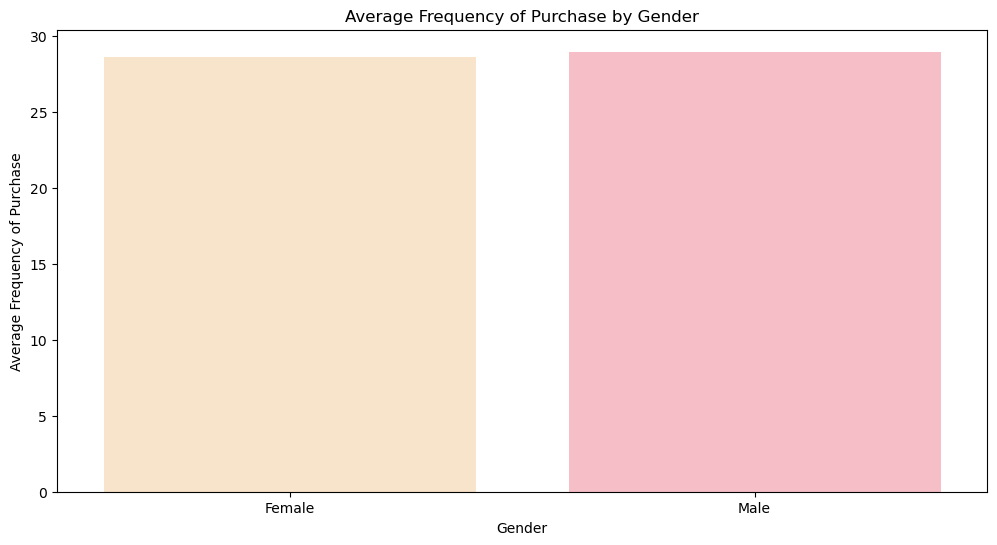

In [33]:
# Step 6: Plot Frequency of Purchase by Gender
custom_palette = sns.color_palette(["#FFE4C4", "#FFB6C1", "#FFDAB9", "#FFC0CB", "#FFD700"])
plt.figure(figsize=(12, 6))
sns.barplot(x='Gender', y='Frequency of Purchases (Numeric)', data=frequency_by_gender, palette=custom_palette)
plt.title('Average Frequency of Purchase by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Frequency of Purchase')
plt.show()

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
from sklearn.utils import class_weight
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [35]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [36]:
# Load your dataset
data = pd.read_csv('shopping_trends.csv')

In [37]:
print(data.head())

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment Method  Shipping Type Discount Applied Promo C

In [38]:
print(data.columns)

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')


In [39]:
season_mapping = {'Spring': 1, 'Summer': 2, 'Fall': 3, 'Winter': 4}
data['Season'] = data['Season'].map(season_mapping)

In [40]:

print("Unique Season_Numeric:", data['Season'].unique())

Unique Season_Numeric: [4 1 2 3]


In [41]:
# Define function to categorize ages into generations
def categorize_generation(age):
    if age <= 24:
        return 'Gen Z'
    elif age <= 40:
        return 'Millennial'
    elif age <= 56:
        return 'Gen X'
    elif age <= 74:
        return 'Baby Boomer'
    else:
        return 'Silent Generation'

In [42]:
# Apply the function to the Age column
data['Generation'] = data['Age'].apply(categorize_generation)

In [43]:
print("Unique Season_Numeric:", data['Generation'].unique())

Unique Season_Numeric: ['Gen X' 'Gen Z' 'Baby Boomer' 'Millennial']


In [44]:
# Map generations to numeric values
generation_mapping = {'Gen Z': 1, 'Millennial': 2, 'Gen X': 3, 'Baby Boomer': 4, 'Silent Generation': 5}
data['Generation'] = data['Generation'].map(generation_mapping)

# Handle missing values
df.dropna(inplace=True)

In [45]:
print("Unique Seasons:", data['Season'].unique())
print("Unique Generation:", data['Generation'].unique())

Unique Seasons: [4 1 2 3]
Unique Generation: [3 1 4 2]


In [46]:
# Encode the 'Item Purchased' column
le_item = LabelEncoder()
data['Item_Purchased_Encoded'] = le_item.fit_transform(data['Item Purchased'])

In [47]:
columns_to_drop = ['Payment Method', 'Customer ID', 'Shipping Type',  'Category', 'Preferred Payment Method', 'Location', 'Size', 'Color', 'Frequency of Purchases', 'Subscription Status', 'Discount Applied', 'Promo Code Used', 'Item Purchased']
data.drop(columns=columns_to_drop, inplace=True)


In [48]:
# Display the resulting DataFrame
print("Data after dropping columns:")
print(data.head())

Data after dropping columns:
   Age Gender  Purchase Amount (USD)  Season  Review Rating  \
0   55   Male                     53       4            3.1   
1   19   Male                     64       4            3.1   
2   50   Male                     73       1            3.1   
3   21   Male                     90       1            3.5   
4   45   Male                     49       1            2.7   

   Previous Purchases  Generation  Item_Purchased_Encoded  
0                  14           3                       2  
1                   2           1                      23  
2                  23           3                      11  
3                  49           1                      14  
4                  31           3                       2  


In [52]:
from sklearn.cluster import KMeans

In [53]:
# Encode Gender
le_gender = LabelEncoder()
data['Gender_Encoded'] = le_gender.fit_transform(data['Gender'])

In [106]:
# Encode Generation
le_generation = LabelEncoder()
data['Generation_Encoded'] = le_generation.fit_transform(data['Generation'])

In [110]:
X = data[['Age', 'Purchase Amount (USD)', 'Gender_Encoded', 'Generation_Encoded']]


In [112]:
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [114]:
# Determine the optimal number of clusters using the elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

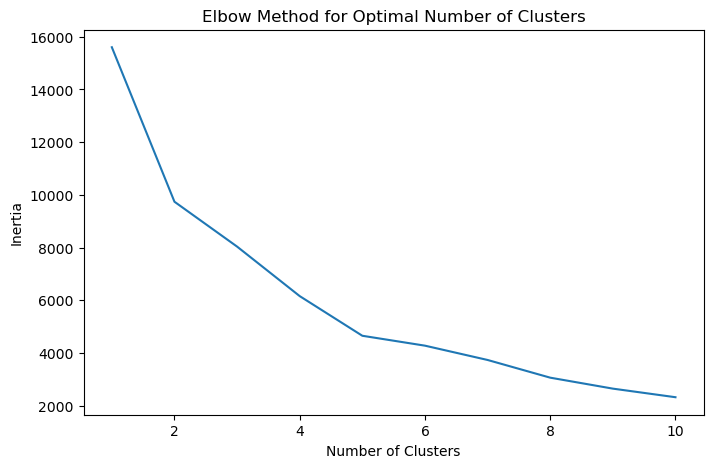

In [118]:
# Plot the elbow method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [120]:
# Fit k-means with the chosen number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=5, random_state=0)
data['Cluster'] = kmeans.fit_predict(X_scaled)

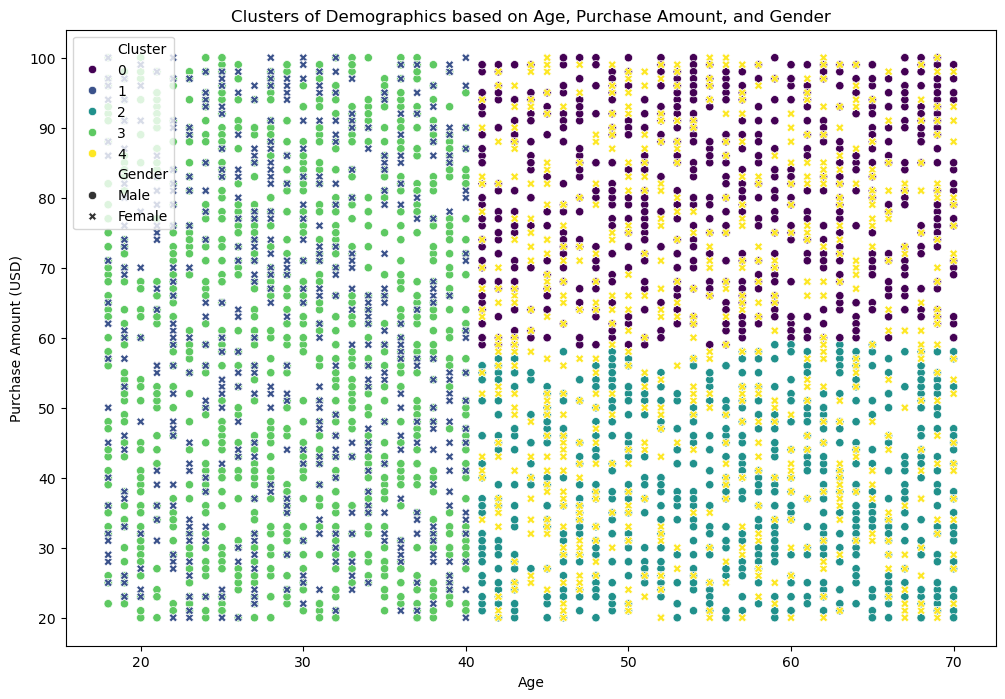

In [122]:
import seaborn as sns

# Plot the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Purchase Amount (USD)', hue='Cluster', data=data, palette='viridis', style='Gender')
plt.title('Clusters of Demographics based on Age, Purchase Amount, and Gender')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.legend()
plt.show()

In [124]:
# Calculate the mean purchase amount for each cluster
cluster_purchase_amount = data.groupby('Cluster')['Purchase Amount (USD)'].mean().reset_index()

# Identify the cluster with the highest mean purchase amount
highest_purchase_cluster = cluster_purchase_amount.loc[cluster_purchase_amount['Purchase Amount (USD)'].idxmax()]

print(f"Cluster with the highest average purchase amount: {highest_purchase_cluster['Cluster']}")
print(f"Highest average purchase amount: {highest_purchase_cluster['Purchase Amount (USD)']}")

Cluster with the highest average purchase amount: 0.0
Highest average purchase amount: 80.18002628120894
